In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [289]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.corpus import stopwords
import random
import string

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/surouthi/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [290]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [291]:
tx1=inaugural.raw(inaugural.fileids()[38])
len(tx1.split())

1360

In [292]:
tx2=inaugural.raw('1961-Kennedy.txt')
len(tx2.split(" "))

1364

In [293]:
tx3=inaugural.raw('1973-Nixon.txt')
len(tx3.split(" "))

1769

In [294]:
tx1[0:9]

'On each n'

In [2464]:
print('First 10 field ids')
inaugural.fileids()[0:9]

First 10 field ids


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt']

In [2466]:
print('First sentence of the first speech')
inaugural.sents(inaugural.fileids()[0])[0]

First sentence of the first speech


['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':']

In [2391]:
print()
print('The number of words in  Mr.Roosevelt speech:', len(inaugural.words('1941-Roosevelt.txt')))
print()
print('The number of words in Mr.Kennedy speech:', len(inaugural.words('1961-Kennedy.txt')))
print()
print('The number of words in Mr.Nixon speech:', len(inaugural.words('1973-Nixon.txt')))
print()


The number of words in  Mr.Roosevelt speech: 1536

The number of words in Mr.Kennedy speech: 1546

The number of words in Mr.Nixon speech: 2028



In [2437]:
print()
print('The number of sentences in  Mr.Roosevelt speech:', len(inaugural.sents('1941-Roosevelt.txt')))
print()
print('The number of sentences in Mr.Kennedy speech:', len(inaugural.sents('1961-Kennedy.txt')))
print()
print('The number of sentences in Mr.Nixon speech:', len(inaugural.sents('1973-Nixon.txt')))
print()


The number of sentences in  Mr.Roosevelt speech: 68

The number of sentences in Mr.Kennedy speech: 52

The number of sentences in Mr.Nixon speech: 69



In [2435]:
print()
print('The number of characters in Mr.Roosevelt speech with spaces:',len(inaugural.raw('1941-Roosevelt.txt')))
print()
print('The number of characters in Mr.Kennedy speech with spaces:',len(inaugural.raw('1961-Kennedy.txt')))
print()
print('The number of characters in Mr.Nixon speech with spaces:',len(inaugural.raw('1973-Nixon.txt')))
print()


The number of characters in Mr.Roosevelt speech with spaces: 7571

The number of characters in Mr.Kennedy speech with spaces: 7618

The number of characters in Mr.Nixon speech with spaces: 9991



In [2436]:
print()
print('The number of characters in Mr. Roosevelts speech without spaces:',len(inaugural.raw('1941-Roosevelt.txt')) - tx1.count(" "))
print()
print('The number of characters in Mr.Kennedy speech without spaces:',len(inaugural.raw('1961-Kennedy.txt')) - tx2.count(" "))
print()
print('The number of characters in Mr.Nixon speech without spaces:',len(inaugural.raw('1973-Nixon.txt')) - tx3.count(" "))
print()


The number of characters in Mr. Roosevelts speech without spaces: 6249

The number of characters in Mr.Kennedy speech without spaces: 6255

The number of characters in Mr.Nixon speech without spaces: 8223



### Removal of stopword, punctuation, stemming & frequent words 

In [2973]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [2974]:
stopwords= nltk.corpus.stopwords.words('english')+list(string.punctuation)

### Roosevelt

In [2975]:
print()
print('First sentence before removing stopwords & punctuation ')
inaugural.sents('1941-Roosevelt.txt')[0]


First sentence before removing stopwords & punctuation 


['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.']

In [2976]:
tot_words_rs= (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 

In [2977]:
tot_words_cl_rs= [word for word in tot_words_rs if word not in stopwords]

In [2978]:
print()
print('First sentence after removing stopwords & punctuation')
tot_words_cl_rs[:11]


First sentence after removing stopwords & punctuation


['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states']

In [2979]:
words_rs = pd.DataFrame(tot_words_cl_rs, columns =['words1'])

In [2980]:
words_rs['words1']=words_rs['words1'].apply(lambda x: " ".join([st.stem(words1) for words1 in x.split()]))

In [2981]:
words_rs['words1'].value_counts().head(15)

--           25
nation       17
know         10
spirit        9
life          9
democraci     9
peopl         9
america       8
us            8
live          7
year          7
freedom       6
human         6
bodi          5
measur        5
Name: words1, dtype: int64

In [2982]:
words_rs['words1'].head(11)

0      nation
1         day
2     inaugur
3        sinc
4        1789
5       peopl
6       renew
7        sens
8       dedic
9        unit
10      state
Name: words1, dtype: object

In [2984]:
words_rs.drop(words_rs[(words_rs['words1']=='us')|(words_rs['words1']=='--')].index, inplace=True)

In [2985]:
print('List of top words in roosevelt')
words_rs['words1'].value_counts().head(15)

List of top words in roosevelt


nation       17
know         10
democraci     9
spirit        9
peopl         9
life          9
america       8
live          7
year          7
freedom       6
human         6
mind          5
bodi          5
men           5
govern        5
Name: words1, dtype: int64

In [2986]:
print()
print('Length of roosevelt speech before processing:',len(inaugural.words('1941-Roosevelt.txt')))
print()
print('Length of roosevelt speech after processing:',len(words_rs['words1']))
print()


Length of roosevelt speech before processing: 1536

Length of roosevelt speech after processing: 624



In [2987]:
words_rs=words_rs['words1']

In [2948]:
roose=" ".join(words_rs)
roose

'nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three score year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fac

### Kennedy

In [2949]:
tot_words_kn= (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 

In [2950]:
tot_words_cl_kn= [word for word in tot_words_kn if word not in stopwords]

In [2951]:
len(tot_words_cl_kn)

722

In [2952]:
words_kn = pd.DataFrame(tot_words_cl_kn, columns =['words2'])

In [2953]:
words_kn['words2']=words_kn['words2'].apply(lambda x: " ".join([st.stem(words2) for words2 in x.split()]))

In [2954]:
words_kn['words2'].value_counts().head(15)

--         25
let        16
us         12
power       9
world       8
nation      8
side        8
new         7
pledg       7
ask         6
citizen     5
free        5
peac        5
final       5
shall       5
Name: words2, dtype: int64

In [2956]:
words_kn.drop(words_kn[(words_kn['words2']=='us')|(words_kn['words2']=='--')].index, inplace=True)

In [2957]:
print('List of top words in kennedy')
words_kn['words2'].value_counts().head(15)

List of top words in kennedy


let        16
power       9
nation      8
world       8
side        8
new         7
pledg       7
ask         6
citizen     5
free        5
peac        5
final       5
shall       5
presid      4
support     4
Name: words2, dtype: int64

In [2958]:
print()
print('Length of kennedy speech before processing:',len(inaugural.words('1961-Kennedy.txt')))
print()
print('Length of kennedy speech after processing:',len(words_kn['words2']))
print()


Length of kennedy speech before processing: 1546

Length of kennedy speech after processing: 685



In [2959]:
kennedy=" ".join(words_kn['words2'])
kennedy

'vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut let word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world let everi nation know whether wish well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend unit 

### Nixon 

In [2960]:
tot_words_nx= (w.lower() for w in inaugural.words('1973-Nixon.txt')) 

In [2961]:
tot_words_cl_nx= [word for word in tot_words_nx if word not in stopwords]

In [2962]:
len(tot_words_cl_nx)

853

In [2963]:
# tot_words_cl_nx=tot_words_cl_nx.apply(lambda x: " ".join([st.stem(words3) for words3 in x.split()]))

In [2964]:
words_nx = pd.DataFrame(tot_words_cl_nx, columns =['words3'])

In [2965]:
words_nx['words3']=words_nx['words3'].apply(lambda x: " ".join([st.stem(words3) for words3 in x.split()]))

In [2966]:
words_nx['words3'].value_counts().head(15)

us         26
let        22
america    21
peac       19
world      18
--         17
respons    17
new        15
nation     15
govern     10
home        9
great       9
year        9
abroad      8
make        8
Name: words3, dtype: int64

In [2968]:
words_nx.drop(words_nx[(words_nx['words3']=='us')|(words_nx['words3']=='--')].index, inplace=True)

In [2969]:
print('List of top words in nixon')
words_nx['words3'].value_counts().head(15)

List of top words in nixon


let        22
america    21
peac       19
world      18
respons    17
nation     15
new        15
govern     10
great       9
home        9
year        9
abroad      8
make        8
better      7
togeth      7
Name: words3, dtype: int64

In [2970]:
print()
print('Length of nixon speech before processing:',len(inaugural.words('1973-Nixon.txt')))
print()
print('Length of nixon speech after processing:',len(words_nx['words3']))
print()


Length of nixon speech before processing: 2028

Length of nixon speech after processing: 810



In [2864]:
nixon=" ".join(words_nx['words3'])
nixon

'mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question shall use peac let resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad let resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw far reach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi 1972 long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom let clearli un

### Roosevelt word cloud

In [3068]:
from wordcloud import WordCloud

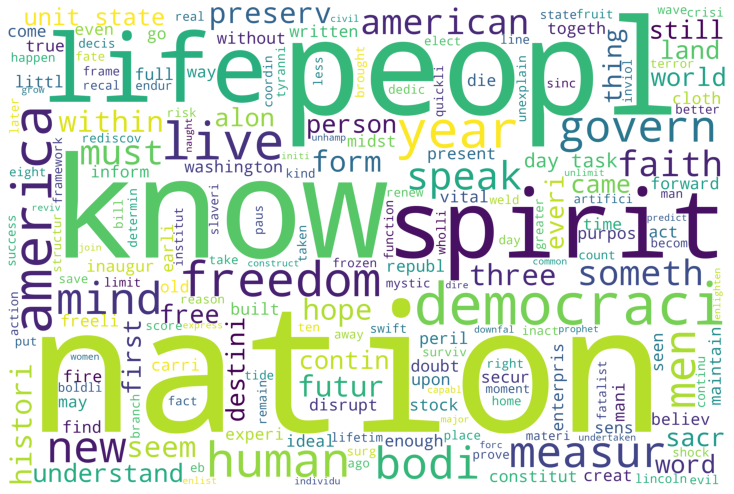

In [3072]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                background_color ='white', 
                      colormap='viridis_r',
                min_font_size = 10, random_state=100).generate(roose) 
  
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

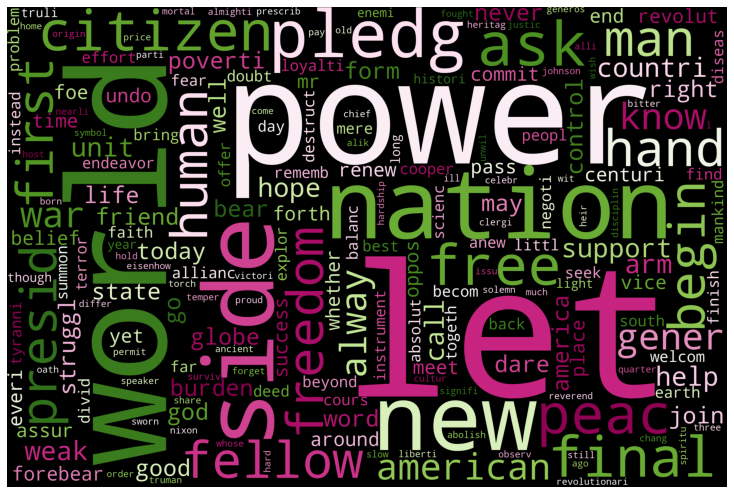

In [3074]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                background_color ='black', 
                      colormap='PiYG',
                min_font_size = 10, random_state=100).generate(kennedy) 
  
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

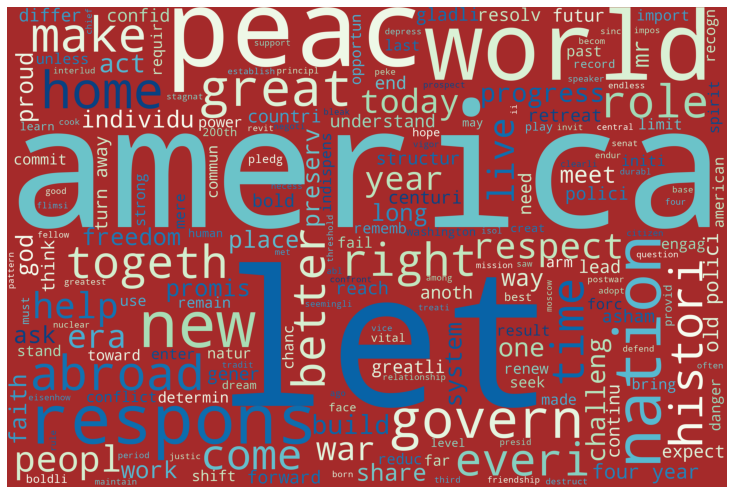

In [3073]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                background_color ='brown', 
                      colormap='GnBu_r',
                min_font_size = 10, random_state=100).generate(nixon) 
  
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 